##Data Science in Finance - Predicting Bitcoin Price
#Final Project Report - Data Science Workshop
Students: Eran Kayat & Andrey Katunin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=64d150e7b0e6d88ad8900195aafbff819d2b89863bc15bb4405f7acf456d2e72
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


#Intro

Bitcoin is a digital currency that was created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

Bitcoin is a type of cryptocurrency. There are no physical bitcoins, only balances kept on a public ledger that everyone has transparent access to. All bitcoin transactions are verified by a massive amount of computing power. Bitcoins are not issued or backed by any banks or governments, nor are individual bitcoins valuable as a commodity. Despite it not being legal tender, Bitcoin is very popular and has triggered the launch of hundreds of other cryptocurrencies, collectively referred to as altcoins. Bitcoin is commonly abbreviated as "BTC".

#Goal

The goal of this project is to use financial data to try to predict bitcoin value and trade bitcoin for profit. The cryptocurrency is well known as an extreme volatility market which might make this project very difficult.

Since this project is a learning exercise, another side goal (which is a more important one) is to try to learn and practice as much as possible of what we have learnt throughout this workshop. We will train several models, both models we have used throughout this workshop and advanced models that use advanced libraries and techniques. In the process we will try to answer the following questions, do certain machine learning algorithms perform better on this type of problem? Does adding more features aid in creating better models?

# Data Cleaning

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/MyDrive/MERGED.csv')
print(df)
df = df.dropna()
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%d/%m/%Y %H:%M')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = pd.to_numeric(df['Timestamp'])
#print(type(df['Timestamp'][0]))
df.set_index('Timestamp')

             Timestamp  avg-block-size  ...  transactions-per-second  utxo-count
0     05/05/2018 00:00        0.726489  ...                 2.083333  51543797.0
1     06/05/2018 00:00        0.758401  ...                 2.150000  51556468.0
2     07/05/2018 00:00        0.867701  ...                 2.216667  51520231.0
3     08/05/2018 00:00        0.915397  ...                 1.783333  51445778.0
4     09/05/2018 00:00        0.732926  ...                 2.216667  51420047.0
...                ...             ...  ...                      ...         ...
1502               NaN             NaN  ...                      NaN         NaN
1503               NaN             NaN  ...                      NaN         NaN
1504               NaN             NaN  ...                      NaN         NaN
1505               NaN             NaN  ...                      NaN         NaN
1506               NaN             NaN  ...                      NaN         NaN

[1507 rows x 36 columns]


,avg-block-size,blocks-size,avg-confirmation-time,cost-per-transaction,cost-per-transaction-percent,difficulty,estimated-transaction-volume,estimated-transaction-volume-usd,fees-usd-per-transaction,hash-rate,market-cap,market-price,median-confirmation-time,mempool-count,mempool-growth,mempool-size,miners-revenue,mvrv,my-wallet-n-users,n-payments,n-payments-per-block,n-transactions,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-unique-addresses,nvt,nvts,output-volume,total-bitcoins,trade-volume,transaction-fees,transaction-fees-usd,transactions-per-second,utxo-count
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1525478400000000000,0.726489,167532.5852,38.961963,101.804726,2.017952,4.020000e+12,105033.80090,1.032424e+09,1.758598,3.030483e+07,1.647610e+11,9696.13,12.575000,2567.0,712.550000,1148866.5,20833828.14,1.600051,24568592.0,331424.0,2419.153285,202703.0,191797.0,1259.024845,314383829.0,450118.0,20.799029,21.124033,1061146.616,17015475.00,611265269.7,32.178315,3.186254e+05,2.083333,51543797.0
1525564800000000000,0.758401,167648.4316,10.056074,98.036237,1.699935,4.020000e+12,102606.56200,9.905558e+08,1.627711,2.970502e+07,1.684410e+11,9837.92,9.483333,6611.0,717.916667,3721469.0,16838802.17,1.584474,24653193.0,375962.0,2506.413333,171761.0,162422.0,1253.729927,314584099.0,386315.0,18.713580,20.920426,1094581.323,17016812.50,619793485.4,31.281958,3.020585e+05,2.150000,51556468.0
1525651200000000000,0.867701,167753.3678,18.523131,87.416140,1.393415,4.020000e+12,139041.28360,1.299196e+09,1.456962,2.956221e+07,1.647270e+11,9631.44,14.125000,1704.0,1215.150000,947088.0,18103183.29,1.613125,24732020.0,415140.0,2986.618705,205063.0,195013.0,1367.086667,314757677.0,450524.0,19.120783,21.297798,1376393.356,17018162.50,531232089.9,35.900143,3.370858e+05,2.216667,51520231.0
1525737600000000000,0.915397,167882.5844,9.660113,75.332243,1.256750,4.020000e+12,141050.96340,1.305600e+09,1.360478,2.901952e+07,1.584680e+11,9369.16,13.608333,3069.0,617.616667,2164894.0,16408115.88,1.586019,24812298.0,381970.0,2387.312500,217810.0,200910.0,1566.978417,314961149.0,480690.0,20.479863,20.935579,1055634.468,17019487.50,614648751.1,34.294136,3.173409e+05,1.783333,51445778.0
1525824000000000000,0.732926,168010.7674,7.623434,89.221231,1.572682,4.020000e+12,134032.00110,1.231496e+09,1.187050,2.959077e+07,1.606170e+11,9186.69,7.100000,1730.0,850.350000,795189.0,19367520.37,1.591819,24888890.0,388558.0,2523.103896,206579.0,195919.0,1291.118750,315180744.0,459143.0,19.539903,21.007414,1062097.000,17020825.00,593072495.7,30.529570,2.953231e+05,2.216667,51420047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619395200000000000,1.314773,341197.8795,45.127224,193.687774,0.678228,2.360000e+13,131967.16330,6.987268e+09,29.692097,1.518923e+08,1.683540e+11,49075.58,13.137500,8932.0,1614.433333,5128360.5,47389587.56,2.809576,52895372.0,713223.0,5022.697183,240687.0,236860.0,2111.289474,636950101.0,703520.0,8.331964,12.834377,2153568.757,18419493.75,576635611.2,167.751607,9.090410e+06,4.600000,66648382.0
1619481600000000000,1.316657,341347.8259,74.534590,191.816045,0.837442,2.360000e+13,125364.34330,6.828182e+09,26.857866,1.542368e+08,1.701660e+11,54056.64,10.062500,10490.0,1471.383333,5444708.5,57182089.26,2.886902,52919425.0,700722.0,4934.661972,298109.0,293396.0,2099.359155,637190939.0,738101.0,8.937480,13.168335,2288671.002,18420168.75,848207062.8,162.307843,8.851481e+06,4.466667,66683025.0
1619568000000000000,1.311625,341534.9068,247.384757,202.180023,1.037548,2.360000e+13,98636.91181,5.400170e+09,30.026450,1.611029e+08,1.693700e+11,55071.46,11.366667,876.5,938.966667,403493.0,56029341.16,2.823035,52932566.0,667650.0,5472.540984,277126.0,271992.0,1951.591549,637489504.0,677778.0,9.374465,12.853807,2005694.124,18420831.25,509014490.5,135.939108,7.443013e+06,2.800000,66626365.0


In [ ]:
import pandas as pd
from ta import add_all_ta_features
df_1min = pd.read_csv ('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',index_col = 'Timestamp')
print(df_1min)
df_1min = df_1min.fillna(method='bfill')
df_1min = df_1min.iloc[4000000:]
#df['Timestamp'] = df['Timestamp'].apply(lambda x: pd.Timestamp(x))
#print(type(df['Timestamp'][0]))
df_1min
# Add all ta features
df_1min = add_all_ta_features(
    df_1min, open="Open", high="High", low="Low", close="Close", volume="Volume_(Currency)")
df_1min.to_csv('Bitcoin_1min_TA')

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


                Open      High  ...  Volume_(Currency)  Weighted_Price
Timestamp                       ...                                   
1325317920      4.39      4.39  ...           2.000000        4.390000
1325317980       NaN       NaN  ...                NaN             NaN
1325318040       NaN       NaN  ...                NaN             NaN
1325318100       NaN       NaN  ...                NaN             NaN
1325318160       NaN       NaN  ...                NaN             NaN
...              ...       ...  ...                ...             ...
1617148560  58714.31  58714.31  ...       81259.372187    58692.753339
1617148620  58683.97  58693.43  ...      428158.146640    58693.226508
1617148680  58693.43  58723.84  ...      100117.070370    58696.198496
1617148740  58742.18  58770.38  ...       42332.958633    58761.866202
1617148800  58767.75  58778.18  ...      159417.751000    58764.349363

[4857377 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

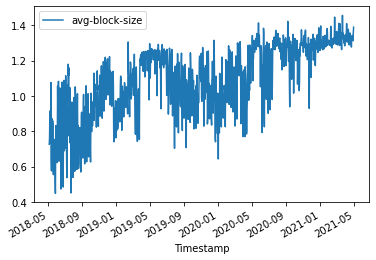

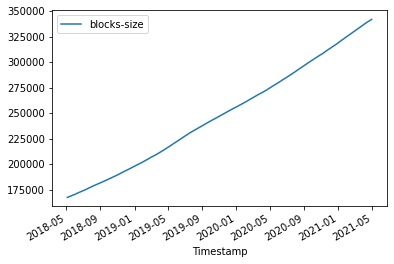

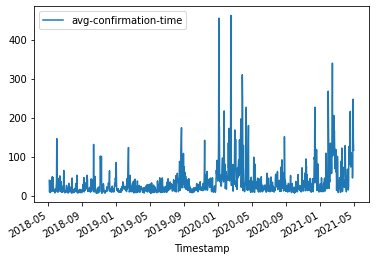

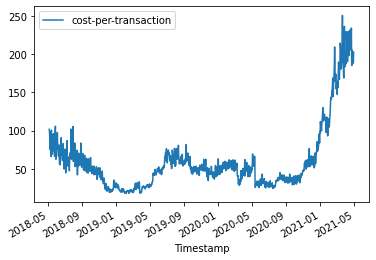

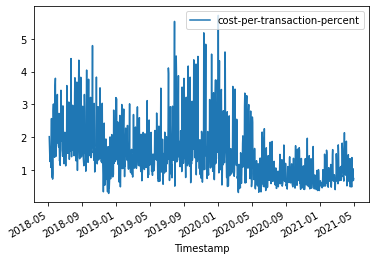

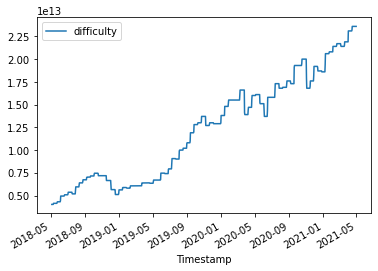

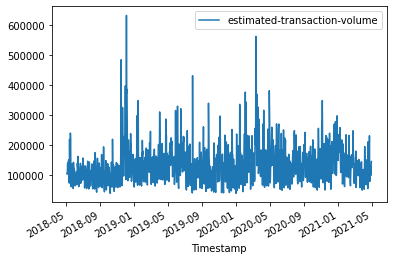

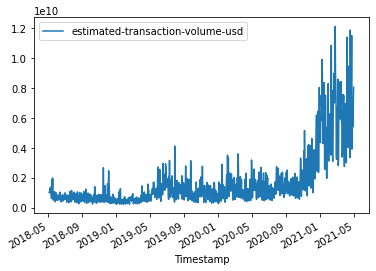

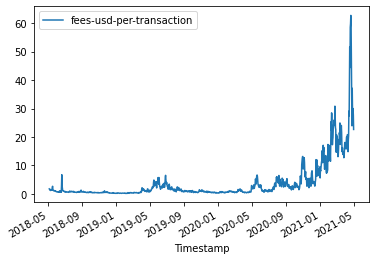

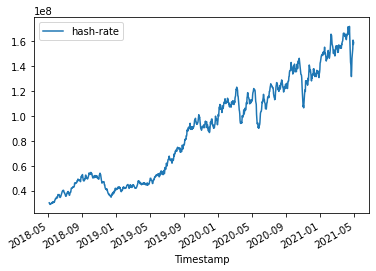

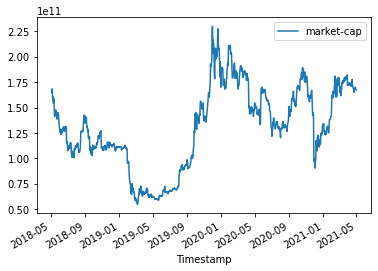

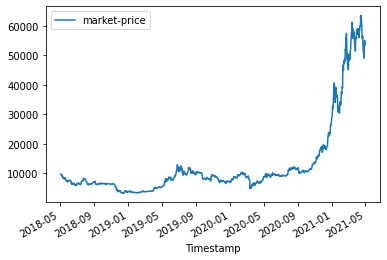

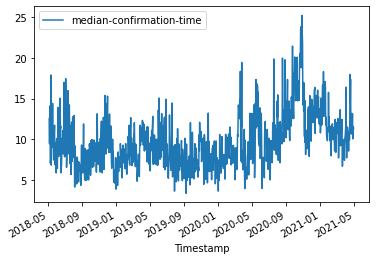

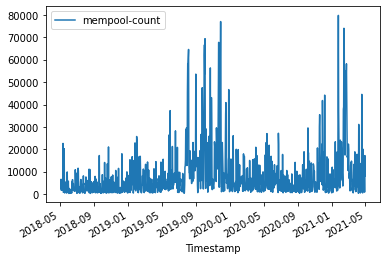

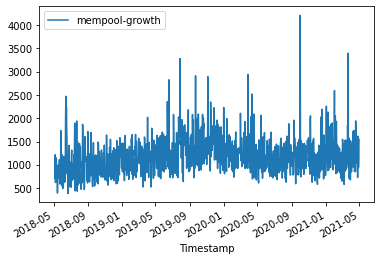

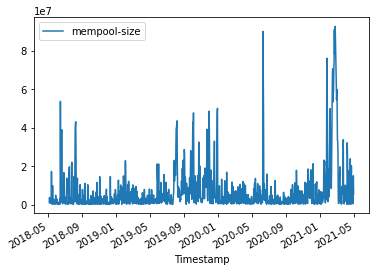

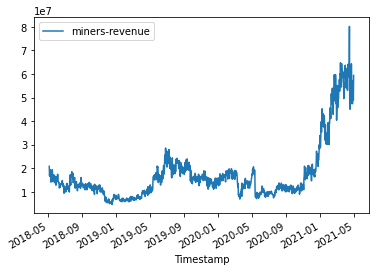

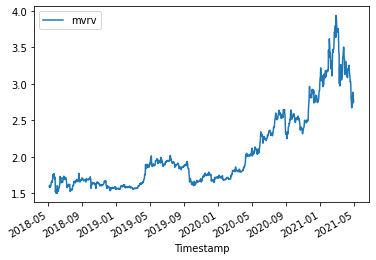

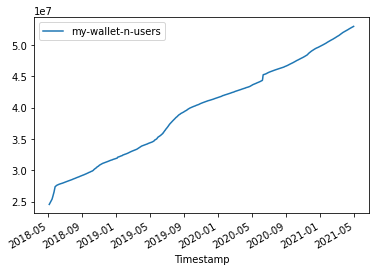

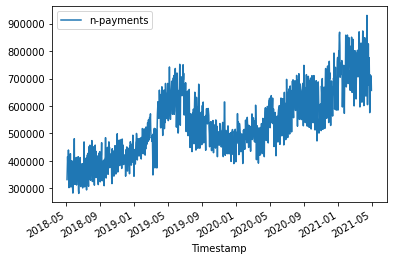

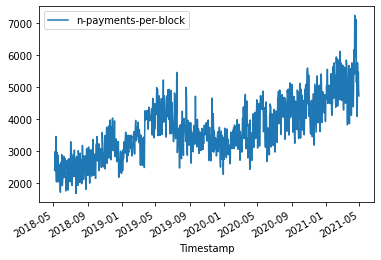

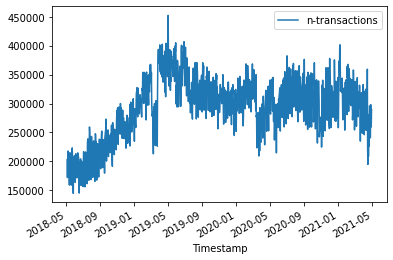

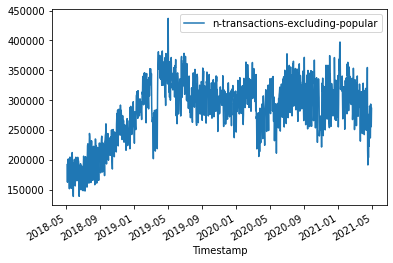

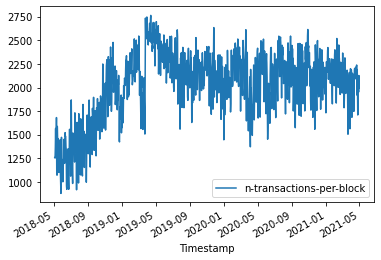

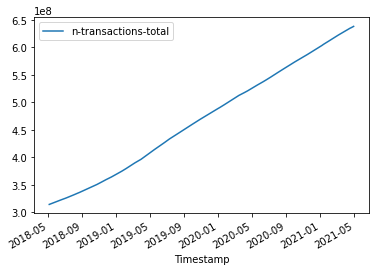

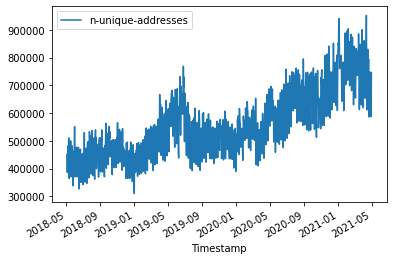

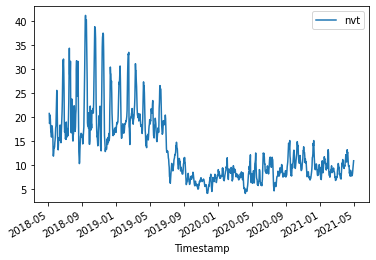

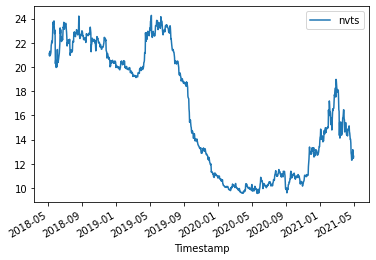

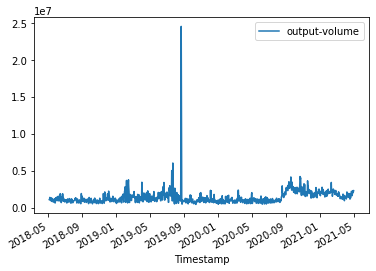

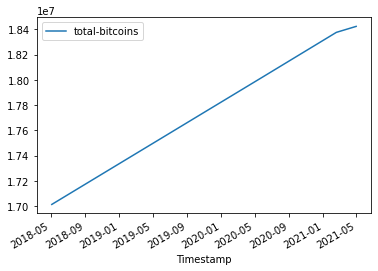

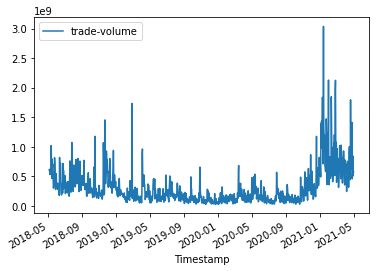

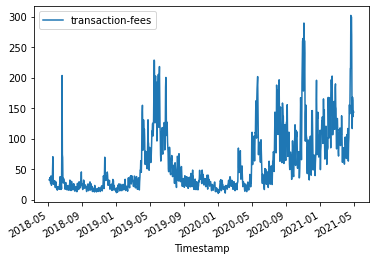

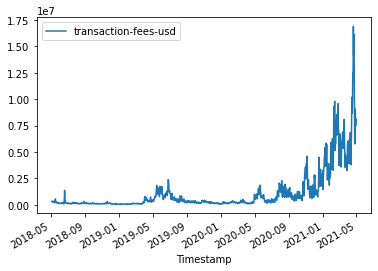

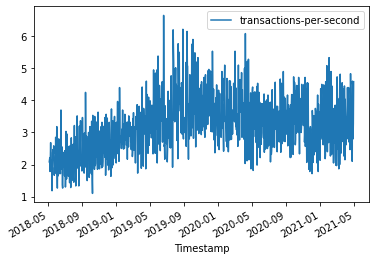

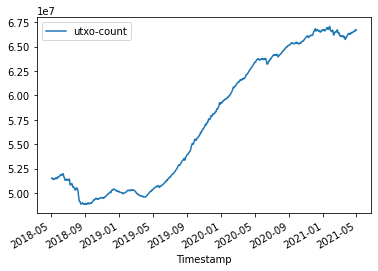

In [ ]:
import matplotlib.pyplot as plt
li = []
for col in df.columns:
    li.append(col)
li.pop(0)

for item in li:
  df.plot(x="Timestamp", y= item)






  


# Preprocess data

explore data

In [ ]:
df.head()

,Timestamp,avg-block-size,blocks-size,avg-confirmation-time,cost-per-transaction,cost-per-transaction-percent,difficulty,estimated-transaction-volume,estimated-transaction-volume-usd,fees-usd-per-transaction,hash-rate,market-cap,market-price,median-confirmation-time,mempool-count,mempool-growth,mempool-size,miners-revenue,mvrv,my-wallet-n-users,n-payments,n-payments-per-block,n-transactions,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-unique-addresses,nvt,nvts,output-volume,total-bitcoins,trade-volume,transaction-fees,transaction-fees-usd,transactions-per-second,utxo-count
0,2018-05-05,0.726489,167532.5852,38.961963,101.804726,2.017952,4.020000e+12,105033.8009,1.032424e+09,1.758598,30304834.80,1.647610e+11,9696.13,12.575000,2567.0,712.550000,1148866.5,20833828.14,1.600051,24568592.0,331424.0,2419.153285,202703.0,191797.0,1259.024845,314383829.0,450118.0,20.799029,21.124033,1061146.616,17015475.0,611265269.7,32.178315,318625.4090,2.083333,51543797.0
1,2018-05-06,0.758401,167648.4316,10.056074,98.036237,1.699935,4.020000e+12,102606.5620,9.905558e+08,1.627711,29705021.86,1.684410e+11,9837.92,9.483333,6611.0,717.916667,3721469.0,16838802.17,1.584474,24653193.0,375962.0,2506.413333,171761.0,162422.0,1253.729927,314584099.0,386315.0,18.713580,20.920426,1094581.323,17016812.5,619793485.4,31.281958,302058.5079,2.150000,51556468.0
2,2018-05-07,0.867701,167753.3678,18.523131,87.416140,1.393415,4.020000e+12,139041.2836,1.299196e+09,1.456962,29562209.25,1.647270e+11,9631.44,14.125000,1704.0,1215.150000,947088.0,18103183.29,1.613125,24732020.0,415140.0,2986.618705,205063.0,195013.0,1367.086667,314757677.0,450524.0,19.120783,21.297798,1376393.356,17018162.5,531232089.9,35.900143,337085.8457,2.216667,51520231.0
3,2018-05-08,0.915397,167882.5844,9.660113,75.332243,1.256750,4.020000e+12,141050.9634,1.305600e+09,1.360478,29019521.35,1.584680e+11,9369.16,13.608333,3069.0,617.616667,2164894.0,16408115.88,1.586019,24812298.0,381970.0,2387.312500,217810.0,200910.0,1566.978417,314961149.0,480690.0,20.479863,20.935579,1055634.468,17019487.5,614648751.1,34.294136,317340.8850,1.783333,51445778.0
4,2018-05-09,0.732926,168010.7674,7.623434,89.221231,1.572682,4.020000e+12,134032.0011,1.231496e+09,1.187050,29590771.77,1.606170e+11,9186.69,7.100000,1730.0,850.350000,795189.0,19367520.37,1.591819,24888890.0,388558.0,2523.103896,206579.0,195919.0,1291.118750,315180744.0,459143.0,19.539903,21.007414,1062097.000,17020825.0,593072495.7,30.529570,295323.1275,2.216667,51420047.0


In [ ]:
df.shape

(1092, 36)

In [ ]:
df.columns

Index(['Timestamp', 'avg-block-size', 'blocks-size', 'avg-confirmation-time',
       'cost-per-transaction', 'cost-per-transaction-percent', 'difficulty',
       'estimated-transaction-volume', 'estimated-transaction-volume-usd',
       'fees-usd-per-transaction', 'hash-rate', 'market-cap', 'market-price',
       'median-confirmation-time', 'mempool-count', 'mempool-growth',
       'mempool-size', 'miners-revenue', 'mvrv', 'my-wallet-n-users',
       'n-payments', 'n-payments-per-block', 'n-transactions',
       'n-transactions-excluding-popular', 'n-transactions-per-block',
       'n-transactions-total', 'n-unique-addresses', 'nvt', 'nvts',
       'output-volume', 'total-bitcoins', 'trade-volume', 'transaction-fees',
       'transaction-fees-usd', 'transactions-per-second', 'utxo-count'],
      dtype='object')

In [ ]:
df.describe()

,avg-block-size,blocks-size,avg-confirmation-time,cost-per-transaction,cost-per-transaction-percent,difficulty,estimated-transaction-volume,estimated-transaction-volume-usd,fees-usd-per-transaction,hash-rate,market-cap,market-price,median-confirmation-time,mempool-count,mempool-growth,mempool-size,miners-revenue,mvrv,my-wallet-n-users,n-payments,n-payments-per-block,n-transactions,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-unique-addresses,nvt,nvts,output-volume,total-bitcoins,trade-volume,transaction-fees,transaction-fees-usd,transactions-per-second,utxo-count
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03,1092.000000,1.092000e+03,1092.000000,1.092000e+03,1.092000e+03,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03,1.092000e+03,1092.000000,1.092000e+03,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03,1092.000000,1092.000000,1092.000000,1.092000e+03,1.092000e+03,1.092000e+03,1092.000000,1.092000e+03,1092.000000,1.092000e+03
mean,1.097220,248459.770695,34.797288,59.467832,1.425502,1.225588e+13,139604.072829,1.766860e+09,3.752569,8.845008e+07,1.306436e+11,12849.962262,9.741972,8085.449634,1205.895177,6.944681e+06,1.749051e+07,2.061463,3.965510e+07,542251.282051,3733.908084,296641.217033,287356.012821,2038.077912,4.693704e+08,570741.292125,13.245245,16.357782,1.392312e+06,1.774061e+07,3.076379e+08,61.212696,1.136821e+06,3.217567,5.737808e+07
std,0.197749,50783.552350,41.542758,42.359360,0.850510,5.697392e+12,64303.331395,1.925699e+09,7.025327,4.064331e+07,4.029228e+10,13265.562936,3.310025,11008.164014,396.219548,1.252057e+07,1.266063e+07,0.546986,7.664063e+06,124182.698077,905.374551,51635.951653,50032.765820,359.131093,9.751385e+07,121840.942618,6.944695,5.060088,1.044784e+06,4.177295e+05,3.014891e+08,51.461018,2.026334e+06,0.890971,6.733163e+06
min,0.448727,167532.585200,5.521109,17.999771,0.285423,4.020000e+12,38328.306290,2.204835e+08,0.159549,2.901952e+07,5.465991e+10,3231.910000,3.366667,295.500000,383.700000,1.033250e+05,4.666604e+06,1.500463,2.456859e+07,280979.000000,1685.197802,144304.000000,138533.000000,879.902439,3.143838e+08,310120.000000,4.169118,9.555929,4.219402e+05,1.701548e+07,2.536850e+07,9.971000,4.154115e+04,1.100000,4.884931e+07
25%,0.964584,202546.828975,13.066495,34.286808,0.780549,6.650000e+12,98352.610185,6.889245e+08,0.574465,4.749669e+07,1.081552e+11,6504.885000,7.341667,1802.500000,932.079167,7.854112e+05,1.040039e+07,1.660742,3.259179e+07,450008.500000,3084.277124,266055.750000,258680.500000,1841.286272,3.787172e+08,476707.750000,8.024527,11.009563,8.793234e+05,1.737868e+07,1.150066e+08,23.146847,1.499307e+05,2.583333,5.040831e+07
50%,1.130917,247151.924200,21.121513,49.322720,1.268406,1.290000e+13,133667.261300,1.066882e+09,1.066688,9.174365e+07,1.307475e+11,8660.960000,9.237500,4310.500000,1174.133333,2.320511e+06,1.371564e+07,1.841482,4.073303e+07,527533.000000,3638.746143,304163.000000,295349.000000,2120.303941,4.705103e+08,551376.000000,10.595018,15.608917,1.163645e+06,1.774201e+07,2.077914e+08,37.389755,3.144732e+05,3.166667,5.668502e+07
75%,1.269419,290902.105800,38.420490,62.731345,1.716286,1.680000e+13,166717.156700,1.829713e+09,3.192853,1.220521e+08,1.647355e+11,10917.857500,11.516667,9583.125000,1419.833333,7.409518e+06,1.824529e+07,2.370137,4.616599e+07,635327.750000,4342.554479,332688.250000,323839.250000,2290.859824,5.538597e+08,651537.500000,17.419408,21.380782,1.708119e+06,1.810507e+07,3.797316e+08,88.441904,9.990739e+05,3.783333,6.419962e+07
max,1.455319,341887.630900,462.462606,250.674039,5.719049,2.360000e+13,632663.240200,1.210261e+10,62.788166,1.721302e+08,2.299200e+11,63554.440000,25.250000,79807.500000,4211.650000,9.254572e+07,8.017224e+07,3.938486,5.299195e+07,930451.000000,7236.203883,452646.000000,437027.000000,2762.540984,6.380256e+08,952400.000000,41.202834,24.264146,2.452867e+07,1.842216e+07,3.039065e+09,301.828227,1.690307e+07,6.650000,6.705673e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         1092 non-null   datetime64[ns]
 1   avg-block-size                    1092 non-null   float64       
 2   blocks-size                       1092 non-null   float64       
 3   avg-confirmation-time             1092 non-null   float64       
 4   cost-per-transaction              1092 non-null   float64       
 5   cost-per-transaction-percent      1092 non-null   float64       
 6   difficulty                        1092 non-null   float64       
 7   estimated-transaction-volume      1092 non-null   float64       
 8   estimated-transaction-volume-usd  1092 non-null   float64       
 9   fees-usd-per-transaction          1092 non-null   float64       
 10  hash-rate                         1092 non-null 

data scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = df.drop(['Timestamp','market-price'], axis =1)
y = df['market-price']

#split data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.10,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = {}
cv_s= {}

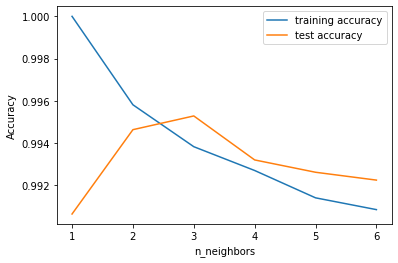

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbor_seetings = range(1,7)

for x in neighbor_seetings:
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))

# Show the relationship of accuarcy and n_neighbors
plt.plot(neighbor_seetings, training_accuracy, label = 'training accuracy')
plt.plot(neighbor_seetings, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
import numpy as np

knr = KNeighborsRegressor(n_neighbors = 3)
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.98485817 0.98927386 0.98874832 0.98312372 0.97689748]
Mean cross-validation training score (5-fold): 0.985


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
forecast_col = 'market-price'
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9673628069198283


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


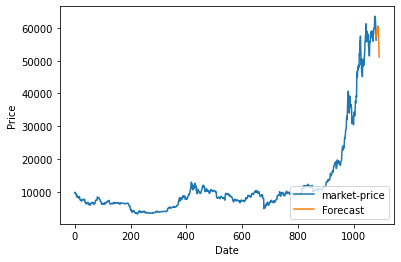

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

X_lately = X[-forecast_out:]
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['market-price'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
forecast_col = 'Close'
forecast_out = int(math.ceil(0.01 * len(df_1min)))
df_1min['label'] = df_1min[forecast_col].shift(-forecast_out)

X = np.array(df_1min.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df_1min.dropna(inplace=True)
y = np.array(df_1min['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9745624648523987


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

X_lately = X[-forecast_out:]
forecast_set = clf.predict(X_lately)
df_1min['Forecast'] = np.nan

last_date = df_1min.iloc[-1].name
last_unix = last_date
one_day = 60
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 60
    df_1min.loc[next_date] = [np.nan for _ in range(len(df_1min.columns)-1)]+[i]



TypeError: ignored

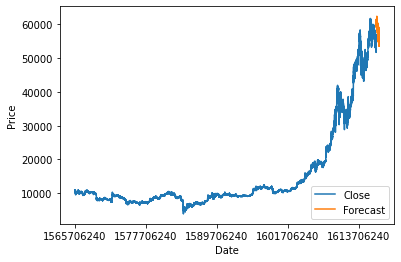

In [ ]:
df_1min['Close'].plot()
df_1min['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
df_1min['Close']

NameError: ignored